In [2]:
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt


In [66]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error , mean_absolute_error , accuracy_score
#from sklearn.model_selection import train_test_split

# preprocessing 

In [3]:
df = pd.read_csv("uber.csv")

In [4]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [7]:
df.info

<bound method DataFrame.info of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC    

In [8]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [10]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [16]:
df.rename(columns={'Unnamed: 0':"id"}, inplace=True)
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df['day']=df['pickup_datetime'].apply(lambda x :x.day);
df['month']=df['pickup_datetime'].apply(lambda x :x.month);
df['year']=df['pickup_datetime'].apply(lambda x :x.year);
df['hour']=df['pickup_datetime'].apply(lambda x :x.hour);
df['weekday']=df['pickup_datetime'].apply(lambda x :calendar.day_name[x.weekday()]);

In [17]:
df

,id,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hour,weekday
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,7,5,2015,19,Thursday
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,17,7,2009,20,Friday
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,24,8,2009,21,Monday
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,26,6,2009,8,Friday
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,28,8,2014,17,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,28,10,2012,10,Sunday
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,14,3,2014,1,Friday
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,29,6,2009,0,Monday
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,20,5,2015,14,Wednesday


In [19]:
df=df[df['fare_amount']>0]
df=df[df['passenger_count']<=8]
df.drop(['id','key','pickup_datetime'], axis=1 , inplace=True)

In [20]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hour,weekday
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,5,2015,19,Thursday
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,7,2009,20,Friday
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,8,2009,21,Monday
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,6,2009,8,Friday
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,8,2014,17,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,28,10,2012,10,Sunday
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,14,3,2014,1,Friday
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,29,6,2009,0,Monday
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,20,5,2015,14,Wednesday


In [21]:
df.weekday

0          Thursday
1            Friday
2            Monday
3            Friday
4          Thursday
            ...    
199995       Sunday
199996       Friday
199997       Monday
199998    Wednesday
199999     Saturday
Name: weekday, Length: 199977, dtype: object

In [24]:
df.weekday=df.weekday.map({"Sunday":0, "Monday":1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6});

In [25]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hour,weekday
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,5,2015,19,4
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,7,2009,20,5
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,8,2009,21,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,6,2009,8,5
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,8,2014,17,4
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,28,10,2012,10,0
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,14,3,2014,1,5
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,29,6,2009,0,1
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,20,5,2015,14,3


In [26]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
day                  0
month                0
year                 0
hour                 0
weekday              0
dtype: int64

In [27]:
df=df.dropna()

In [28]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
day                  0
month                0
year                 0
hour                 0
weekday              0
dtype: int64

# outliers


<AxesSubplot:xlabel='fare_amount'>

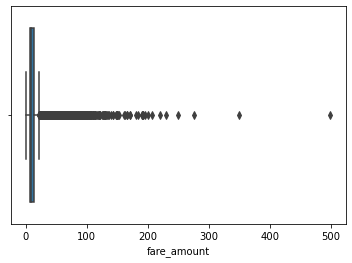

In [29]:
sns.boxplot(x='fare_amount' , data=df)

In [34]:
Q1 = np.percentile(df['fare_amount'] , 25 , interpolation='midpoint')
Q3 = np.percentile(df['fare_amount'] , 75 , interpolation='midpoint')

IQR=Q3-Q1

upper=Q3+1.5*IQR
lower = Q1-1.5*IQR

In [35]:
print("lower ", lower)
print("upper " , upper)

lower  -3.75
upper  22.25


In [36]:
print("outliers")
df[(df['fare_amount']<lower) | (df['fare_amount'] >upper)][{'fare_amount','day','month','year'}]


outliers


,month,day,year,fare_amount
6,10,12,2014,24.50
30,5,21,2011,25.70
34,6,4,2014,39.50
39,2,13,2014,29.00
48,1,3,2013,56.80
...,...,...,...,...
199976,10,18,2011,49.70
199977,11,20,2012,43.50
199982,8,6,2014,57.33
199985,4,18,2015,24.00


In [38]:
print("old shape" , df.shape)
df = df[(df['fare_amount']>=lower) & (df['fare_amount']<=upper)]
print("new shape" , df.shape)

old shape (199976, 11)
new shape (182821, 11)


<AxesSubplot:xlabel='fare_amount'>

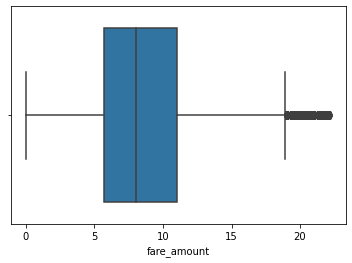

In [39]:
sns.boxplot(x='fare_amount' , data=df)

In [41]:
corr_matrix = round(df.corr(),2)
corr_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hour,weekday
fare_amount,1.00,0.00,0.00,-0.00,0.00,0.01,0.01,0.03,0.14,-0.01,0.02
pickup_longitude,0.00,1.00,-0.81,0.84,-0.85,-0.00,0.00,-0.00,0.01,0.00,-0.00
pickup_latitude,0.00,-0.81,1.00,-0.77,0.68,-0.00,-0.01,0.00,-0.01,-0.00,0.00
dropoff_longitude,-0.00,0.84,-0.77,1.00,-0.91,0.00,0.00,-0.00,0.01,0.00,-0.00
dropoff_latitude,0.00,-0.85,0.68,-0.91,1.00,-0.00,-0.01,0.00,-0.01,-0.00,-0.00
passenger_count,0.01,-0.00,-0.00,0.00,-0.00,1.00,0.00,0.01,0.00,0.02,0.01
day,0.01,0.00,-0.01,0.00,-0.01,0.00,1.00,-0.02,-0.01,0.01,0.01
month,0.03,-0.00,0.00,-0.00,0.00,0.01,-0.02,1.00,-0.12,-0.00,-0.00
year,0.14,0.01,-0.01,0.01,-0.01,0.00,-0.01,-0.12,1.00,0.00,-0.00
hour,-0.01,0.00,-0.00,0.00,-0.00,0.02,0.01,-0.00,0.00,1.00,0.03


<AxesSubplot:>

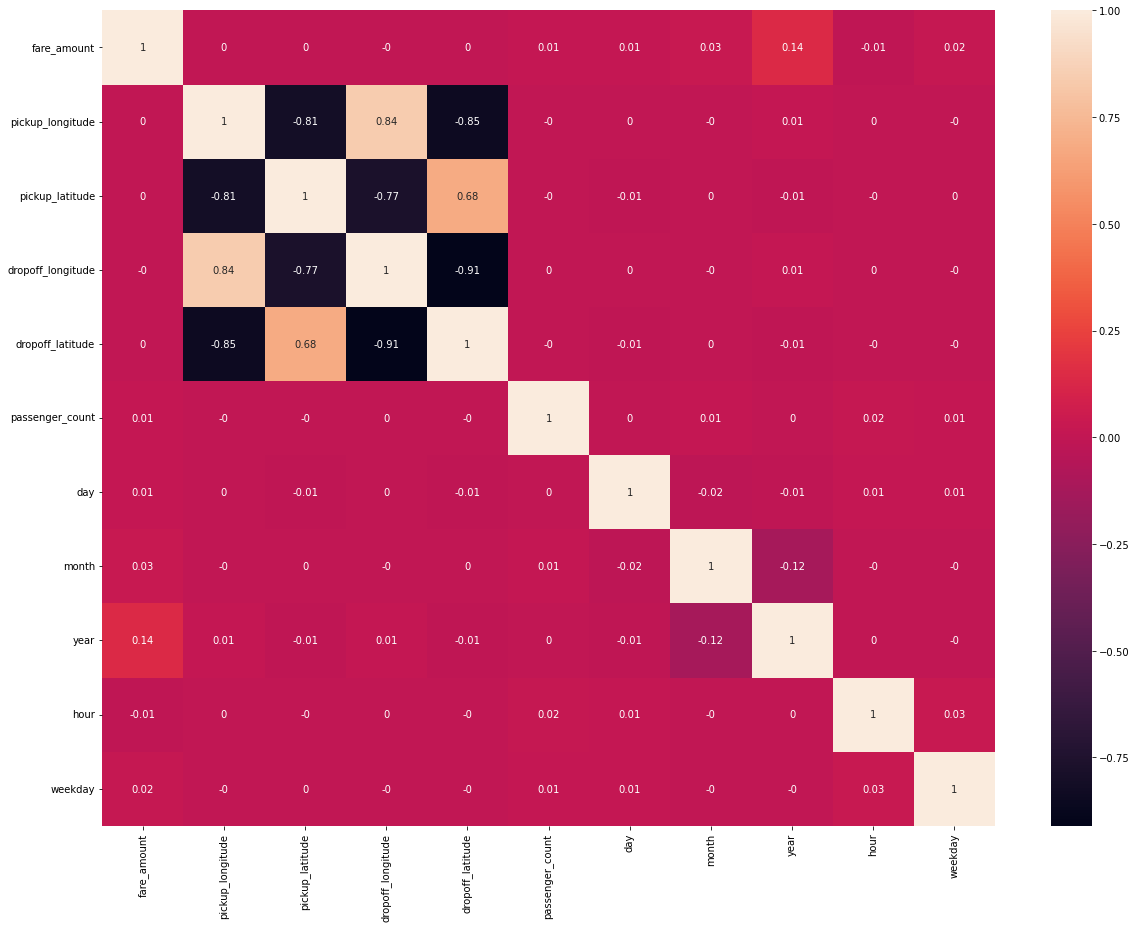

In [42]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True)

### linear regression


In [43]:
x = df.drop('fare_amount' , axis=1)
y = df['fare_amount']

In [44]:
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hour,weekday
0,-73.999817,40.738354,-73.999512,40.723217,1,7,5,2015,19,4
1,-73.994355,40.728225,-73.994710,40.750325,1,17,7,2009,20,5
2,-74.005043,40.740770,-73.962565,40.772647,1,24,8,2009,21,1
3,-73.976124,40.790844,-73.965316,40.803349,3,26,6,2009,8,5
4,-73.925023,40.744085,-73.973082,40.761247,5,28,8,2014,17,4
...,...,...,...,...,...,...,...,...,...,...
199994,-73.983070,40.760770,-73.972972,40.754177,1,31,1,2014,14,5
199995,-73.987042,40.739367,-73.986525,40.740297,1,28,10,2012,10,0
199996,-73.984722,40.736837,-74.006672,40.739620,1,14,3,2014,1,5
199998,-73.997124,40.725452,-73.983215,40.695415,1,20,5,2015,14,3


In [45]:
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199994    12.0
199995     3.0
199996     7.5
199998    14.5
199999    14.1
Name: fare_amount, Length: 182821, dtype: float64

In [51]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=1)

In [52]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hour,weekday
155815,-74.003410,40.751267,-73.999867,40.745835,2,30,4,2009,22,4
27616,-73.974218,40.751765,-73.955965,40.778148,1,12,10,2011,19,3
122768,-73.980811,40.759109,-73.917882,40.754974,1,1,3,2014,0,6
191323,-73.990847,40.750695,-73.994997,40.734060,1,17,5,2011,18,2
62254,-73.987675,40.771227,-73.967665,40.803795,1,24,10,2014,23,5


In [53]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hour,weekday
176146,-73.988240,40.754865,-73.975695,40.759425,6,17,7,2013,9,3
39649,-73.981306,40.724879,-73.996428,40.725486,1,28,10,2011,16,5
83671,-73.958707,40.764050,-73.958707,40.764050,1,18,12,2013,9,3
183922,-73.915300,40.779400,-73.923500,40.761100,1,18,6,2011,0,6
26202,-73.993040,40.727919,-73.977150,40.751498,1,4,6,2011,17,6


In [55]:
x_train.shape


(146256, 10)

In [56]:
x_test.shape

(36565, 10)

In [61]:
ss = preprocessing.StandardScaler()
x_trian = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [72]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [68]:
lrmodel = LinearRegression()

In [69]:
lrmodel.fit(x_trian , y_train)

LinearRegression()

In [74]:
y_pred = lrmodel.predict(x_test)
df_pred = pd.DataFrame({'Actual' : y_test , 'predicated' :y_pred})
df_pred.head(10)

,Actual,predicated
0,9.5,9.586672
1,8.5,8.976306
2,6.0,9.649910
3,9.3,8.938668
4,8.1,8.724896
5,7.7,8.296916
6,7.3,9.116215
7,17.3,8.305642
8,9.7,8.734735
9,9.0,9.738842


In [75]:
print("regression coeffient " , lrmodel.coef_)

regression coeffient  [ 0.04681514  0.0342183  -0.02682751 -0.0063804   0.04924538  0.03211746
  0.17077173  0.58896141 -0.06186189  0.09037254]


In [76]:
print("Intercept " , lrmodel.intercept_)

Intercept  8.931780234657069


In [77]:
print("mean squared error " ,  mean_squared_error(y_test, y_pred))

mean squared error  16.933564374924288


In [78]:
print("mean absoute error " , mean_absolute_error(y_test,y_pred))

mean absoute error  3.2618394062974816


In [79]:
print("root mean squared error", np.sqrt(mean_squared_error(y_test,y_pred)))

root mean squared error 4.115041236114687


In [80]:
print("r2 score " , metrics.r2_score(y_test , y_pred))

r2 score  0.019181175931181516


In [83]:
rfmodel = RandomForestRegressor(n_estimators=10 , random_state=1)


In [85]:
rfmodel.fit(x_train , y_train)


RandomForestRegressor(n_estimators=10, random_state=1)

In [89]:
rf_pred = rfmodel.predict(x_test)
df1_pred = pd.DataFrame({'Actual' : y_test , 'predicated' :rf_pred})
df1_pred.head(10)

,Actual,predicated
0,9.5,10.02
1,8.5,11.86
2,6.0,9.75
3,9.3,11.86
4,8.1,10.66
5,7.7,10.22
6,7.3,11.86
7,17.3,9.86
8,9.7,9.59
9,9.0,9.59


In [90]:
rfmodel_pred.head(10)

,Actual,predicted
0,9.5,9.586672
1,8.5,8.976306
2,6.0,9.649910
3,9.3,8.938668
4,8.1,8.724896
5,7.7,8.296916
6,7.3,9.116215
7,17.3,8.305642
8,9.7,8.734735
9,9.0,9.738842


In [91]:
print("random forest regression Model :")
print("MSE:", mean_squared_error(y_test, rf_pred))
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print('R2 Score:',metrics.r2_score(y_test, rf_pred))

random forest regression Model :
MSE: 20.13317762614522
MAE: 3.805641186927389
RMSE: 4.487000961237385
R2 Score: -0.16614548283091124
